In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('D:/UKM/Data Science & Analytics/Machine Learning/Assignment1')

In [3]:
oral_toxicity = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

In [37]:
oral_toxicity.shape

(8992, 1026)

In [38]:
oral_toxicity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8992 entries, 1 to 8992
Columns: 1026 entries, 1 to toxic
dtypes: int32(1), int64(1024), object(1)
memory usage: 70.4+ MB


In [6]:
oral_toxicity.columns=np.arange(1,1026) 
oral_toxicity.index=np.arange(1,len(oral_toxicity.index)+1) 

In [7]:
oral_toxicity.head()

,1,2,3,4,5,6,7,8,9,10,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


In [8]:
oral_toxicity.tail()

,1,2,3,4,5,6,7,8,9,10,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
8988,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8989,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8990,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,negative
8991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
8992,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,negative


In [9]:
#find the total of missing values
oral_toxicity.isnull().sum().sum()

0

In [10]:
#find the unque values for all columns
b=[]
for col in oral_toxicity:
    a=oral_toxicity[col].unique()
    b.extend(a)
set(b)

{0, 1, 'negative', 'positive'}

In [11]:
#create a column for the encoded categorical variable in the column 1025
oral_toxicity['toxic']=np.where(oral_toxicity[1025]=='positive', 1,0)

In [12]:
#to confirm if the column toxic was encoded correctly
oral_toxicity.loc[oral_toxicity[1025]=='positive']

,1,2,3,4,5,6,7,8,9,10,...,1017,1018,1019,1020,1021,1022,1023,1024,1025,toxic
8,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,positive,1
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1
61,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1
8907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1
8931,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,positive,1
8942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,1


In [13]:
#convert the whole dataframe from integer to boolean
#oral_toxicity=oral_toxicity.astype('bool')

In [14]:
#class distribution
oral_toxicity['toxic'].value_counts()

0    8251
1     741
Name: toxic, dtype: int64

In [16]:
#splitting the data
X, y =oral_toxicity.iloc[:,:1024], oral_toxicity['toxic']

In [17]:
X.shape

(8992, 1024)

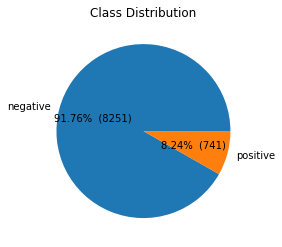

In [54]:
explode = [0.03,0.1]
plt.title('Class Distribution')
plt.ylabel("")

values = [oral_toxicity[1025].value_counts()[0],oral_toxicity[1025].value_counts()[1]] 
labels = ['negative','positive'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Class Distribution')
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
#create a model
lr= LogisticRegression(max_iter = 400)

In [20]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

In [21]:
from sklearn.model_selection import KFold

In [22]:
crossvalidation = KFold(n_splits=5, random_state=2022, shuffle=True)

In [23]:
from sklearn.model_selection import cross_validate

In [24]:
#crossvalidation without taking into account the class imbalance
score_1 = cross_validate(lr, X, y, scoring =scoring, cv= crossvalidation, n_jobs=1)

In [25]:
from sklearn.model_selection import StratifiedKFold

In [26]:
strat_sampling = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)

In [27]:
#crossvalidation with stratified sampling
score_2= cross_validate(lr, X, y, scoring = scoring, cv= strat_sampling, n_jobs=1)

In [28]:
print("\033[1m"+'Average cross-validation scores(5-Fold) without taking into account the class imbalance:'+"\033[0;0m")
print("--------------------------------")
for i in range(2,len(score_1)):
    print(list(score_1.keys())[i]+" "+
          "%.2f (+/-%.2f)" % (list(score_1.values())[i].mean(), list(score_1.values())[i].std()))

Average cross-validation scores(5-Fold) without taking into account the class imbalance:
--------------------------------
test_accuracy 0.92 (+/-0.01)
test_precision 0.55 (+/-0.07)
test_recall 0.41 (+/-0.04)
test_f1_score 0.47 (+/-0.05)


In [29]:
print("\033[1m"+'Average cross-validation scores(5-Fold) without taking into account the class imbalance:'+"\033[0;0m")
print("--------------------------------")
for i in range(2,len(score_2)):
    print(list(score_2.keys())[i]+" "+
          "%.2f (+/-%.2f)" % (list(score_2.values())[i].mean(), list(score_2.values())[i].std()))

Average cross-validation scores(5-Fold) without taking into account the class imbalance:
--------------------------------
test_accuracy 0.92 (+/-0.01)
test_precision 0.55 (+/-0.05)
test_recall 0.41 (+/-0.02)
test_f1_score 0.47 (+/-0.02)


In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
#Random oversampling
ros = RandomOverSampler(sampling_strategy=1) # "not majority" or 1, both offer the same strategy
X_res, y_res = ros.fit_resample(X, y)

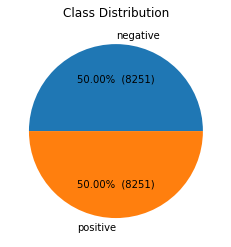

In [53]:
values = [y_res.value_counts()[0],y_res.value_counts()[1]] 
labels = ['negative','positive'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Class Distribution')
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

In [56]:
#crossvalidation with stratified sampling after oversampling the minority class
score_3= cross_validate(lr, X_res, y_res, scoring = scoring, cv= strat_sampling, n_jobs=1)

In [57]:
print("\033[1m"+'Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not very toxic):'+"\033[0;0m")
print("--------------------------------")
for i in range(2,len(score_2)):
    print(list(score_3.keys())[i]+" "+
          "%.2f (+/-%.2f)" % (list(score_3.values())[i].mean(), list(score_3.values())[i].std()))

Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not very toxic):
--------------------------------
test_accuracy 0.93 (+/-0.00)
test_precision 0.89 (+/-0.01)
test_recall 0.98 (+/-0.01)
test_f1_score 0.93 (+/-0.00)
